In [213]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import networkx as nx

In [275]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [2]:
def choose_next_node(pheromone,cost,last_node,option,iteration,alpha,beta):
    next_node=random.choice(option)
    if iteration>1:
        prob=[]
        option.sort()
        cum_p=0
        denominator=0
        for op in option:
            cum_p+=(pheromone[last_node][op] ** alpha) \
                         * ((1.0 / cost[last_node][op]) ** beta)
            
            prob.append(cum_p)
            denominator += (pheromone[last_node][op] ** alpha) \
            * ((1.0 / cost[last_node][op]) ** beta)
            
        prob/=denominator
        prob=list(prob)
        
        next_node_prob=random.random()
        for p in prob:
            if next_node_prob <= p:
                next_node= option[prob.index(p)]
                break
        
    return next_node

In [262]:
def ACO_TSP():
    it=1
    res=False
    graph=[]
    pheromone=np.full((city_n,city_n),0)
    for i in range(city_n):
        pheromone[i][i]=0
    while(it<=iteration and res==False):
        g2=G.copy()
        pher=np.zeros((city_n,city_n))        # delta tau
        all_path=[]
        path_cost=[]
        for i in range(ant_n):       # for each ant
            path=[]
            last_node=start
            dis=0                   # initital traversal distance =0
            option=[op for op in range(1,city_n)]
            for j in range(city_n-1):    # traverse all the cities
                #p=random.choice(option)
                p=choose_next_node(pheromone,cost,last_node,option,it,alpha,beta)    #select next city 
                path.append(p)
                option.remove(p)
                g2.add_edge(last_node,p)
                dis+=cost[last_node][p]              #distance after traversal
                last_node=p
                
            dis+=cost[last_node][start]
            #g2.add_edge(last_node,start)
            path.append(start)
            all_path.append(path)
            path_cost.append(dis)
            res = all_path.count(all_path[0]) == len(all_path)
            #print(dis)

            curr_node=start
            for p in path:                              #add pheromone on traversed path
                pher[curr_node][p]+= (1/dis)
                curr_node=p

        pheromone= pheromone*(1-e) + pher*e             #update pheromone
        graph.append(g2)
        it+=1
    return all_path,path_cost,graph

In [310]:
e = .5         #evaporation rate
alpha = 3     #pheromone factor
beta = 5     #favorability of distance
start=0
iteration=200
ant_n = 20
city_n = 15

/home/shubhaam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


## **ITERATION : 1**

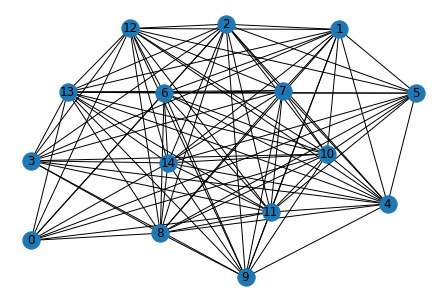

## **ITERATION : 2**

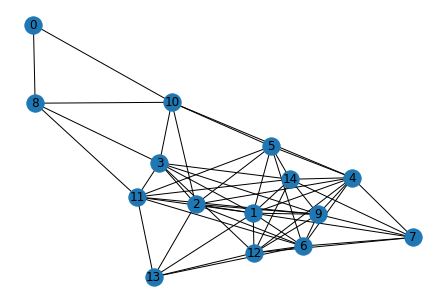

## **ITERATION : 3**

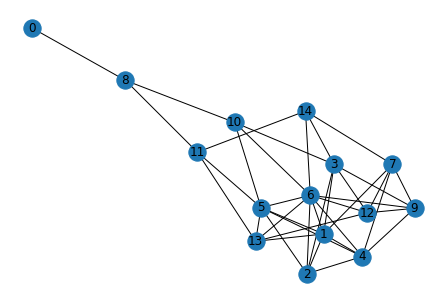

## **ITERATION : 4**

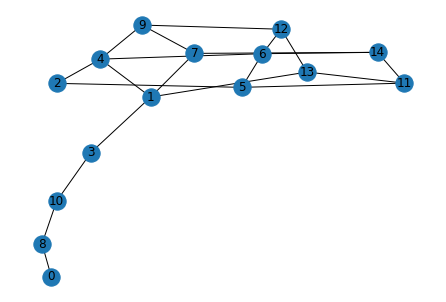

## **ITERATION : 5**

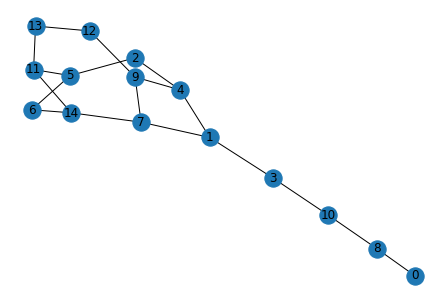

## **ITERATION : 6**

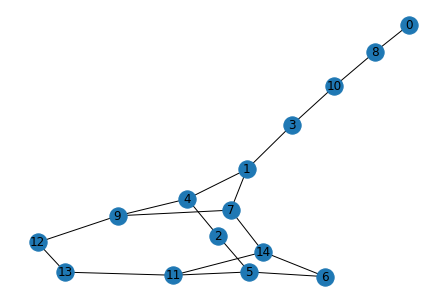

## **ITERATION : 7**

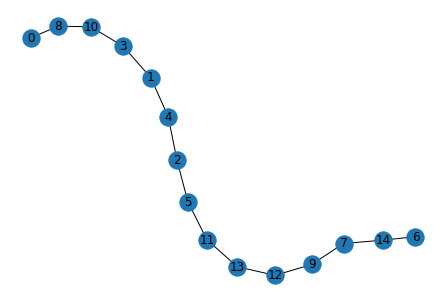

## **PATH => [8, 10, 3, 1, 4, 2, 5, 11, 13, 12, 9, 7, 14, 6, 0]**

## **COST => 34**

[[0 7 5 5 3 9 5 2 2 3 5 7 9 6 7]
 [7 0 8 5 4 2 8 4 7 9 6 2 9 6 6]
 [5 8 0 8 2 1 3 9 3 4 1 5 9 6 6]
 [5 5 8 0 9 4 5 5 2 6 1 7 9 6 2]
 [3 4 2 9 0 4 4 4 6 7 1 4 4 9 7]
 [9 2 1 4 4 0 6 1 3 8 1 2 5 7 4]
 [5 8 3 5 4 6 0 2 9 6 6 7 2 5 4]
 [2 4 9 5 4 1 2 0 6 2 5 9 3 4 1]
 [2 7 3 2 6 3 9 6 0 9 1 2 8 4 3]
 [3 9 4 6 7 8 6 2 9 0 8 7 2 5 5]
 [5 6 1 1 1 1 6 5 1 8 0 3 7 4 8]
 [7 2 5 7 4 2 7 9 2 7 3 0 7 1 2]
 [9 9 9 9 4 5 2 3 8 2 7 7 0 1 4]
 [6 6 6 6 9 7 5 4 4 5 4 1 1 0 8]
 [7 6 6 2 7 4 4 1 3 5 8 2 4 8 0]]


In [312]:
cost=np.random.randint(low=1,high=10, size=(city_n,city_n))
for i in range(city_n):
    cost[i][i]=0
    for j in range(i+1,city_n):
            cost[i][j]=cost[j][i] 
g=nx.Graph()
for i in range(city_n):
    g.add_node(i)
G=g.copy()
for i in range(city_n):
    for j in range(city_n):
        g.add_edge(i,j)
        
path,net_cost,graph=ACO_TSP()
for i in range(len(graph)):
    printmd(f"## **ITERATION : {i+1}**")
    nx.draw(graph[i],with_labels=1)
    plt.show()
printmd(f"## **PATH => {path[0]}**")
printmd(f"## **COST => {net_cost[0]}**")
print(cost)

In [333]:
ant_n = 20
city_n = 20
cost=np.random.randint(low=1,high=10, size=(city_n,city_n))
for i in range(city_n):
    cost[i][i]=0
    for j in range(i+1,city_n):
            cost[i][j]=cost[j][i] 


In [346]:
e = 0.3         
alpha = 2     
beta = 3
evp=[]
Steps=[]
for i in range(5):
    path,net_cost,graph=ACO_TSP()
    evp.append(e)
    Steps.append(len(graph))
    e+=0.1

/home/shubhaam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


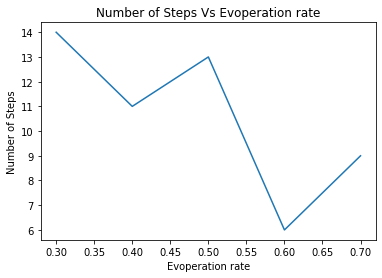

In [347]:
plt.xlabel('Evoperation rate') 
plt.ylabel('Number of Steps')
plt.title('Number of Steps Vs Evoperation rate')
plt.plot(evp,Steps)
plt.show()

In [348]:
e = 0.6         
alpha = 1     
ant_n = 20
city_n = 20
alp=[]
bta=[]
Steps=[] 
for i in range(5):
    beta = 1
    for j in range(5):
        path,net_cost,graph=ACO_TSP()
        bta.append(beta)
        alp.append(alpha)
        Steps.append(len(graph))
        beta+=1
    alpha+=1

/home/shubhaam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


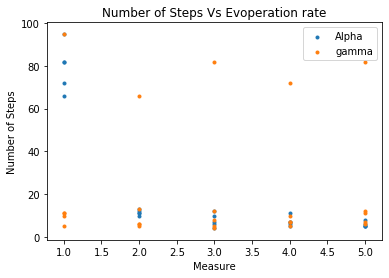

In [356]:
plt.xlabel('Measure') 
plt.ylabel('Number of Steps')
plt.title('Number of Steps Vs Evoperation rate')
plt.scatter(alp,Steps,label="Alpha",marker='.')
plt.scatter(bta,Steps,label="gamma",marker='.')
plt.legend()
plt.show()